In [16]:
import numpy as np
import pandas as pd
import random
import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
data = pd.read_csv('weather.csv', header = 0)

In [17]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
data.isnull().sum(axis = 0)    

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [19]:
print (data.isin([' ','NULL',0]).mean())

Date             0.000000
Location         0.000000
MinTemp          0.001093
MaxTemp          0.000096
Rainfall         0.626152
Evaporation      0.001677
Sunshine         0.016218
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.060120
WindSpeed3pm     0.007645
Humidity9am      0.000007
Humidity3pm      0.000027
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.059412
Cloud3pm         0.034195
Temp9am          0.000247
Temp3pm          0.000117
RainToday        0.000000
RainTomorrow     0.000000
dtype: float64


In [20]:
df=pd.DataFrame(data)
df = df.drop(columns=['Date','Location','WindDir3pm', 'WindGustDir', 'WindDir9am'])
df=df.replace('Yes',1).replace('No',0)

In [21]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [22]:
df=df.fillna(df.mean(axis=0), axis=0)
df.isnull().sum(axis = 0)   
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0.0,0.0


In [23]:
X=df.drop("RainTomorrow", axis=1)

In [24]:
Cost = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 11)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    Cost.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    

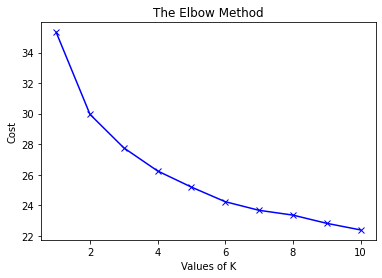

In [14]:
plt.plot(K, Cost, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Cost')
plt.title('The Elbow Method')
plt.show()

In [18]:
kmeanModel = KMeans(n_clusters=5).fit(X)
kmeanModel.fit(X)
 
print(kmeanModel.cluster_centers_)

[[7.06822108e+00 1.81905243e+01 1.26056460e+00 3.96260440e+00
  6.97207875e+00 2.92538515e+01 7.71172597e+00 1.30950241e+01
  8.57566560e+01 5.65572671e+01 1.02309946e+03 1.02066106e+03
  4.78464369e+00 4.68086651e+00 1.11543827e+01 1.72242618e+01
  2.07897271e-01]
 [1.29306492e+01 2.12312569e+01 3.13790557e+00 5.35876641e+00
  7.10739441e+00 5.71738755e+01 2.35734100e+01 2.93543894e+01
  6.72605397e+01 5.67969849e+01 1.01407227e+03 1.01263351e+03
  4.93852840e+00 4.99485484e+00 1.68665757e+01 1.94023344e+01
  3.38213914e-01]
 [1.45059217e+01 3.08957048e+01 1.83665468e-01 7.99916757e+00
  9.34980533e+00 4.48527361e+01 1.74936828e+01 1.95068330e+01
  4.05144179e+01 2.21148226e+01 1.01570668e+03 1.01251991e+03
  3.05597201e+00 3.42889373e+00 2.18676019e+01 2.93817894e+01
  2.84326507e-02]
 [1.30558674e+01 2.50744985e+01 7.92772873e-01 5.59171147e+00
  8.38167382e+00 3.59087248e+01 1.18804535e+01 1.70630670e+01
  6.44286294e+01 4.56285913e+01 1.01816798e+03 1.01545223e+03
  3.96019929e+00